# Import data

In [1]:
import pandas as pd
df = pd.read_csv('data/reddit_vm.csv')

C:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1585 non-null   object 
 1   score      1585 non-null   int64  
 2   id         1585 non-null   object 
 3   url        464 non-null    object 
 4   comms_num  1585 non-null   int64  
 5   created    1585 non-null   float64
 6   body       1213 non-null   object 
 7   timestamp  1585 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 99.2+ KB


In [4]:
df.shape

(1585, 8)

In [5]:
print(df.isnull().sum())
print((df.isnull().sum()/len(df)) * 100)

title           0
score           0
id              0
url          1121
comms_num       0
created         0
body          372
timestamp       0
dtype: int64
title         0.000000
score         0.000000
id            0.000000
url          70.725552
comms_num     0.000000
created       0.000000
body         23.470032
timestamp     0.000000
dtype: float64


In [6]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['day_of_week'] = pd.DatetimeIndex(df['timestamp']).dayofweek

In [7]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,year,month,day,day_of_week
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45,2021,2,27,5
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07,2021,2,26,4
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08,2021,2,21,6
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13,2021,2,20,5
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28,2021,2,16,1


<AxesSubplot:>

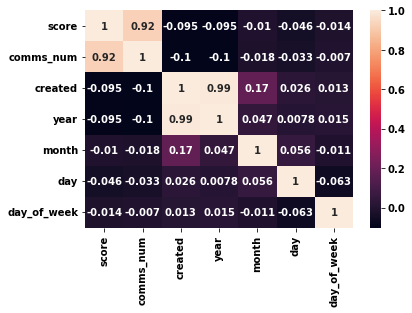

In [8]:
import seaborn as sns

sns.heatmap(df.corr(method='pearson'),annot=True)

# EDA

<AxesSubplot:xlabel='comms_num', ylabel='Density'>

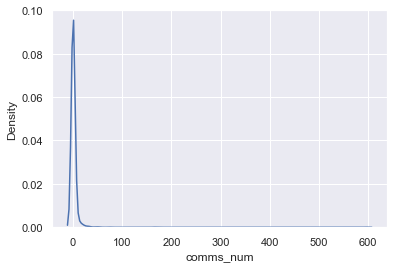

In [9]:
sns.set_theme()
sns.kdeplot(df['comms_num'])

C:\Users\silly\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comms_num', ylabel='Density'>

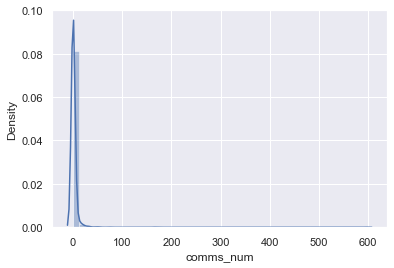

In [10]:
sns.set_theme()
sns.distplot(df['comms_num'])

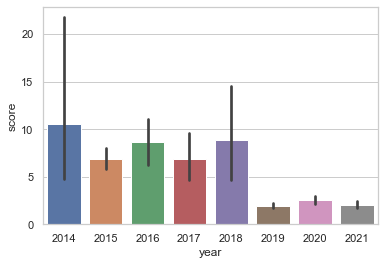

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'year', y = 'score', data = df)

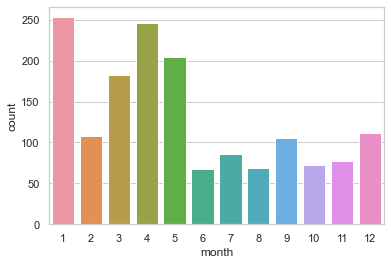

In [12]:
ax = sns.countplot(x = 'month', data = df)

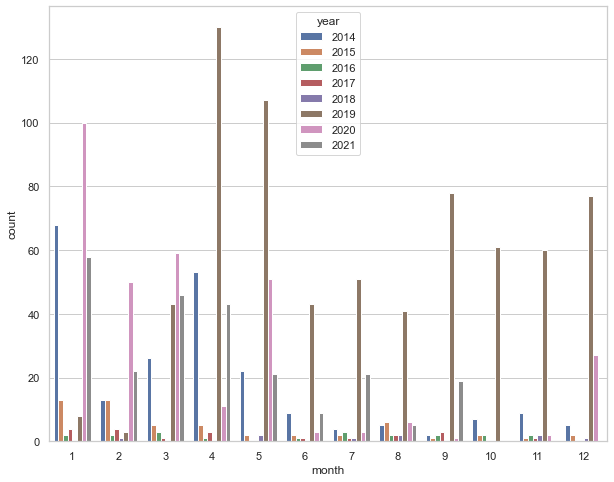

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'month',hue = 'year', data = df)

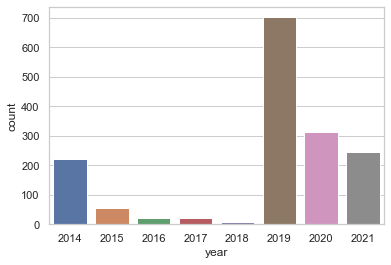

In [14]:
ax = sns.countplot(x = 'year', data = df)

In [15]:
df = df.drop(columns = ['id','url', 'comms_num', 'created', 'timestamp'], axis = 1)
df.head()

,title,score,body,year,month,day,day_of_week
0,Health Canada approves AstraZeneca COVID-19 va...,7,NaN,2021,2,27,5
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,NaN,2021,2,26,4
2,Coronavirus variants could fuel Canada's third...,6,NaN,2021,2,21,6
3,Canadian government to extend COVID-19 emergen...,1,NaN,2021,2,20,5
4,Canada: Pfizer is 'extremely committed' to mee...,6,NaN,2021,2,16,1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\silly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


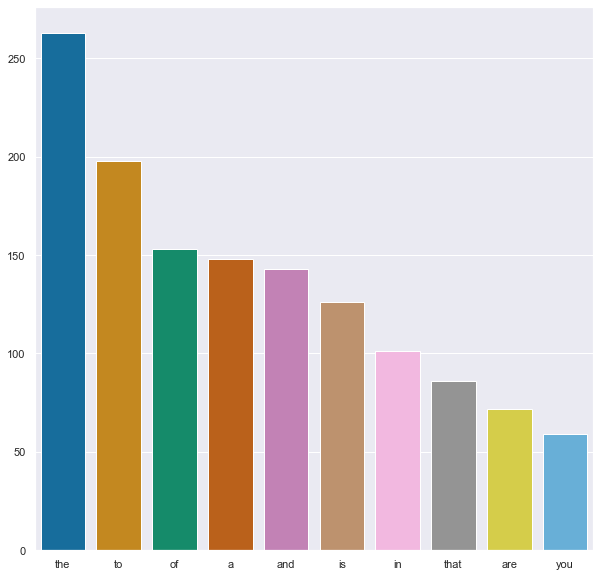

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

corpus = []
title = df.title.str.split()
title = title.values.tolist()
corpus = [word for i in title for word in i]

from collections import defaultdict

dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] += 1
        
sorted_dic = list(reversed(sorted(list(dic.items()), key=lambda x: x[1])))

keys = [i[0] for i in sorted_dic[:10]]
values = [i[1] for i in sorted_dic[:10]]

sns.set(rc={'figure.figsize':(10,10)})

fig = sns.barplot(x=keys, y=values, palette='colorblind')

# Stopwords

0       Health Canada approves AstraZeneca COVID-19 va...
1       COVID-19 in Canada: 'Vaccination passports' a ...
2       Coronavirus variants could fuel Canada's third...
3       Canadian government to extend COVID-19 emergen...
4       Canada: Pfizer is 'extremely committed' to mee...
                              ...                        
1580                                              Comment
1581                                              Comment
1582                                              Comment
1583                                              Comment
1584                                              Comment
Name: title, Length: 1585, dtype: object

In [43]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def stopword(col):
    words = []
    for word in col.items():
        if word not in stop:
            words.append(word[1].lower())
    col = pd.Series(data = words) 
    return col



In [ ]:
df['title'] = stopword(df['title'])
df['body'] = stopword(df['body'])
df.head()

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['title'] = df['title'].astype(str)
df['body'] = df['body'].astype(str)

df['title'] = df['title'].apply(lambda word: " ".join(word.lower() for word in word.split() if word not in stopwords.words('english')))
df['body'] = df['body'].apply(lambda word: " ".join(word.lower() for word in word.split() if word not in stopwords.words('english')))
df.head(5)


,title,score,body,year,month,day,day_of_week,polarity
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2,27,5,0.000
1,covid-19 canada: 'vaccination passports' near ...,2,nan,2021,2,26,4,0.100
2,coronavirus variants could fuel canada's third...,6,nan,2021,2,21,6,0.000
3,canadian government extend covid-19 emergency ...,1,nan,2021,2,20,5,0.000
4,canada: pfizer 'extremely committed' meeting v...,6,nan,2021,2,16,1,-0.125


# Polarity of messages

In [30]:
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

C:\Users\silly\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

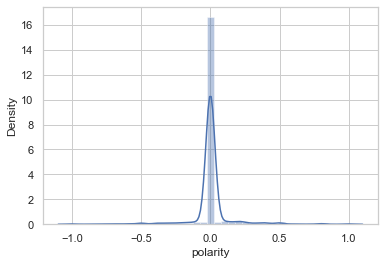

In [31]:
df['polarity'] = df['title'].apply(lambda x : polarity(x))
sns.distplot(df['polarity'])

In [32]:
df.head()

,title,score,body,year,month,day,day_of_week,polarity
0,health canada approves astrazeneca covid-19 va...,7,nan,2021,2,27,5,0.000
1,covid-19 canada: 'vaccination passports' near ...,2,nan,2021,2,26,4,0.100
2,coronavirus variants could fuel canada's third...,6,nan,2021,2,21,6,0.000
3,canadian government extend covid-19 emergency ...,1,nan,2021,2,20,5,0.000
4,canada: pfizer 'extremely committed' meeting v...,6,nan,2021,2,16,1,-0.125


In [42]:
# Positive > 0
for i, v in enumerate(df['title'][df['polarity'] > 0.0].head(6)):
    print(i, v)

0 covid-19 canada: 'vaccination passports' near certainty says bio-ethicist
1 is 100% injected aluminum absorbed?
2 a vaccine debate group juts started up. if you’re interested joining.
3 i love fighting un axed facts.
4 antivax nonsense nothing new
5 a great article: myths vs facts covid vaccine


In [34]:
# Neutral = 0
for i, v in enumerate(df['title'][df['polarity'] == 0.0].head()):
    print(i, v)

0 health canada approves astrazeneca covid-19 vaccine
1 coronavirus variants could fuel canada's third wave
2 canadian government extend covid-19 emergency benefits
3 comment
4 comment


In [35]:
# Negative < 0
for i, v in enumerate(df['title'][df['polarity'] < 0.0].sample(5)):
    print(i, v)

0 i autistic child. don't know caused it, saying indeed vaccines cause it, exceptable risk... makes want kick right filthy cunt.
1 the disgusting anti-vaxxer i've probably encountered date.
2 use youtube video try prove polio vaccine bad. doesn't realize two forms vaccine. also realize risk poliomyelitis greater risk vapp. use nominal numbers rather percentage make argument vapp.
3 toni braxton claims son’s autism god’s punishment abortion, may due vaccinations
4 it aspirin killed millions 1918-19. now mandated unknown, untested vaccines banned adjuvants threaten country millions death


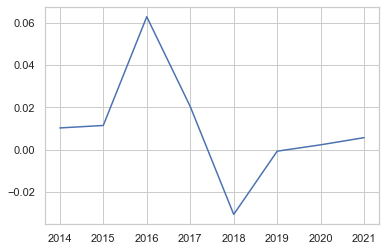

In [36]:
stat = df[['year','polarity']].groupby('year').mean().reset_index()
plt.plot(stat['year'],stat['polarity'])
plt.show()

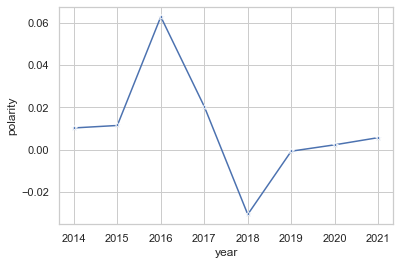

In [37]:
ax = sns.lineplot(x='year', y='polarity', data=stat, marker='*')

In [57]:
import nltk
from nltk import word_tokenize 
from collections import Counter 

def get_nn(col):
    noun = []
    for n in col.items():
        pos = nltk.pos_tag(word_tokenize(n[1]))
        for word, tag in pos:
            #NN = noun
            if tag == 'NN':
                if word not in stop:
                    noun.append(word.lower())
    col = pd.Series(data = noun) 
    return col         

In [54]:
get_nn(df['title'][~(df['title'] == 'comment')])

0         health
1         canada
2        vaccine
3       covid-19
4         canada
          ...   
1619         use
1620     abandon
1621     picture
1622         ddt
1623       beach
Length: 1624, dtype: object

# The most common words 

<AxesSubplot:>

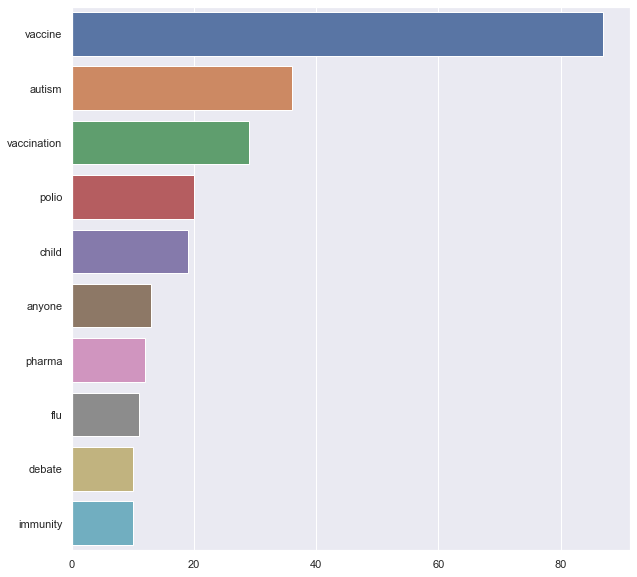

In [55]:
words = get_nn(df['title'][~(df['title'] == 'comment')])
counter = Counter(words)

x, y = list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y, y=x)

<BarContainer object of 10 artists>

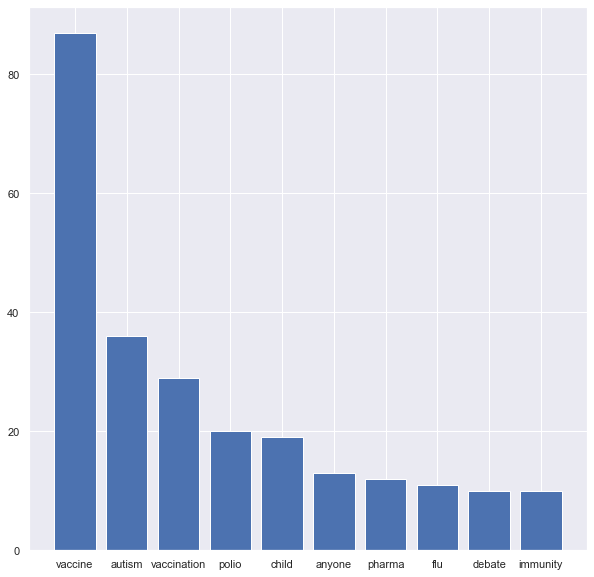

In [56]:
words = get_nn(df['title'][~(df['title'] == 'comment')])
counter = Counter(words)

word_dict = {}
for x, y in counter.most_common(10):
    d = {x:y}
    word_dict.update(d)
    
plt.bar(word_dict.keys(), word_dict.values())